In [1]:
import storm
import os

In [2]:
isacc = storm.DataDerivedStorms('/Users/catherinej/PycharmProjects/OWI/Storm_0486/NACCS_TP_0486_SYN_L2', wind_file_ext='WND', pressure_file_ext='PRE')

<class 'list'> 2204886
<class 'list'> 1102876


In [10]:
isacc.wind_data[0].DT

datetime.datetime(2000, 7, 12, 12, 0)

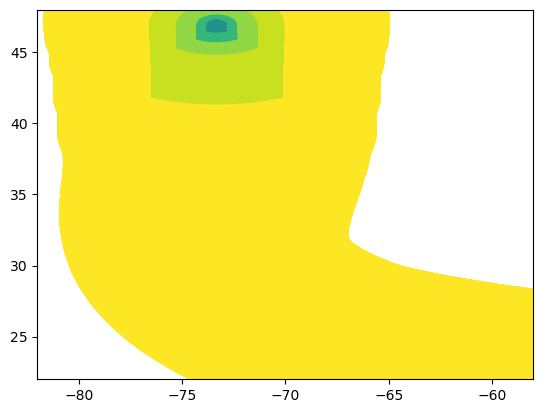

In [3]:
isacc.parse_data()

In [4]:
# if no closed contour find largest contour within x degrees or distance?
isacc.write_data_derived('test_486')

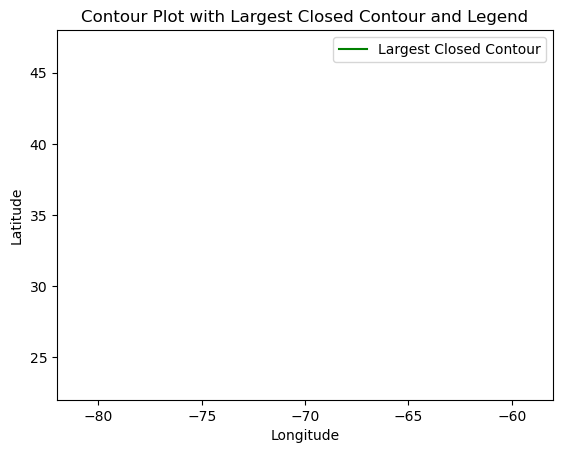

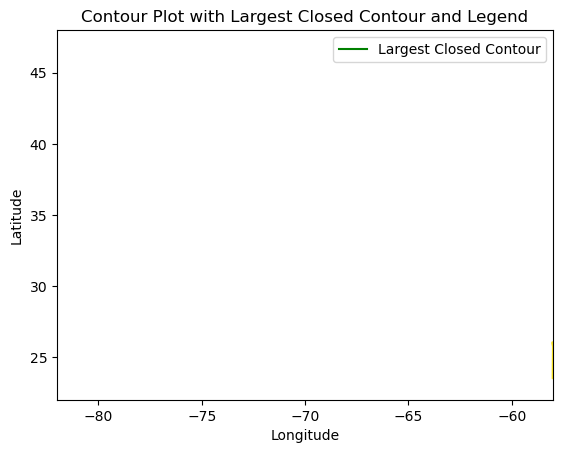

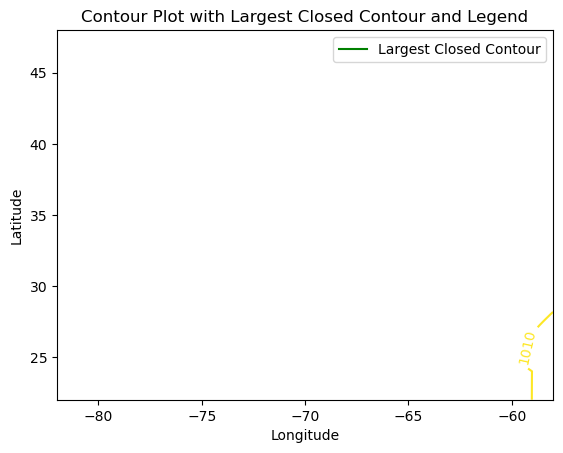

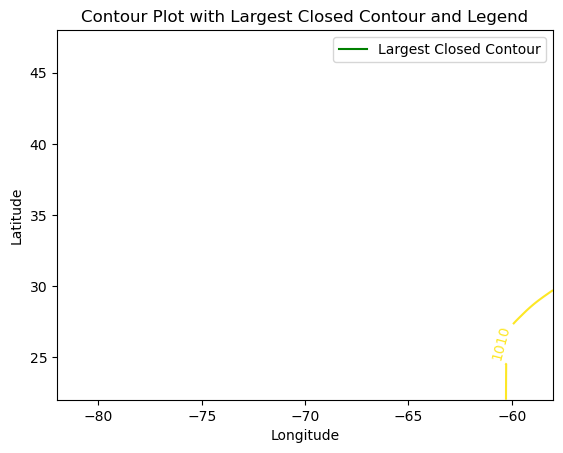

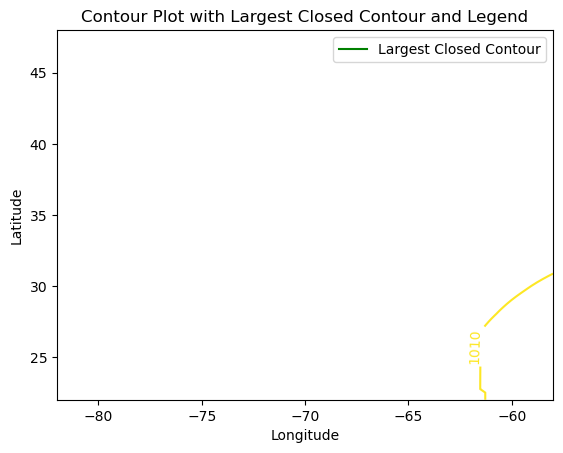

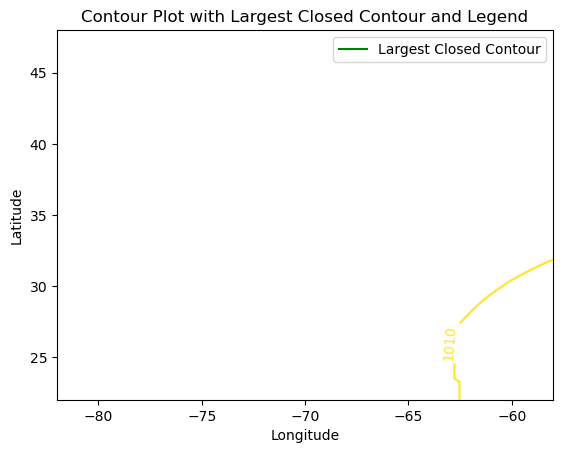

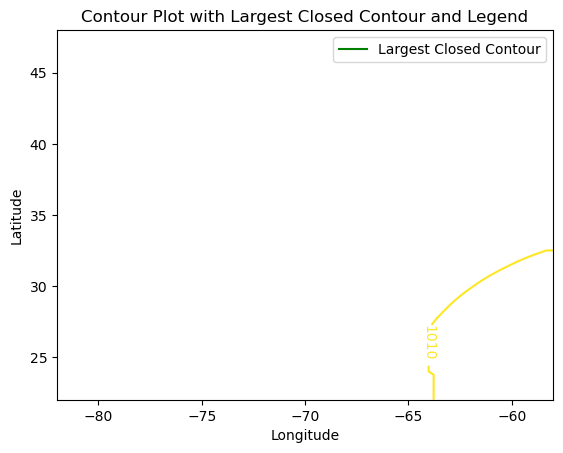

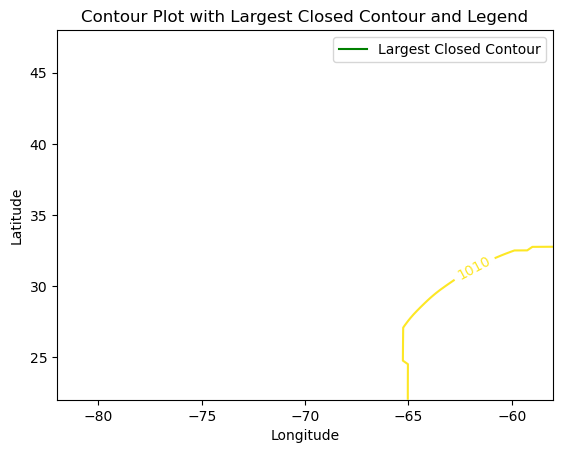

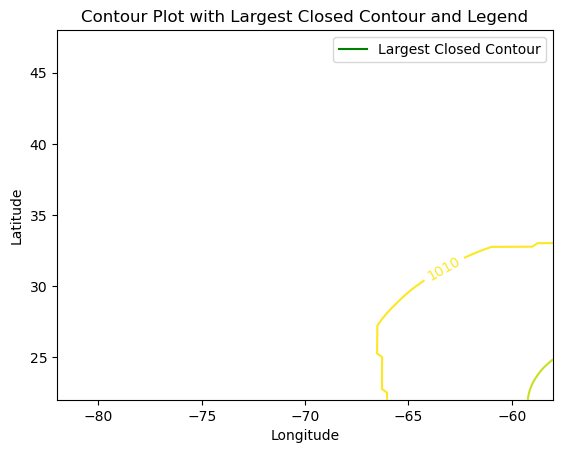

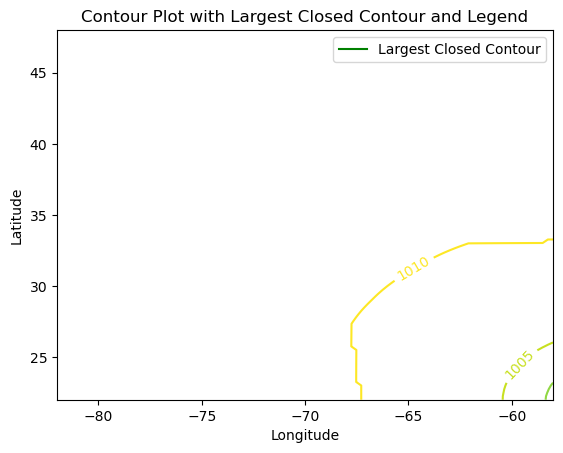

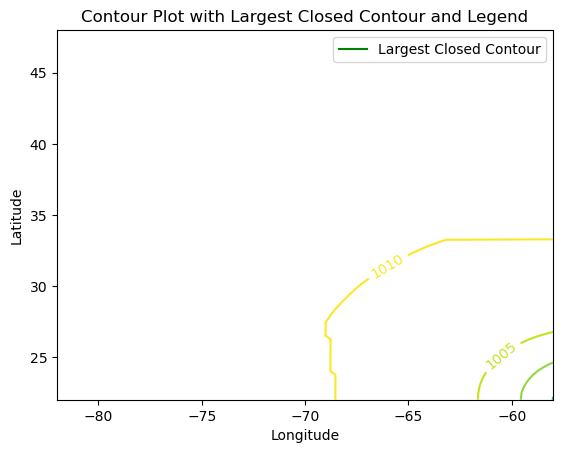

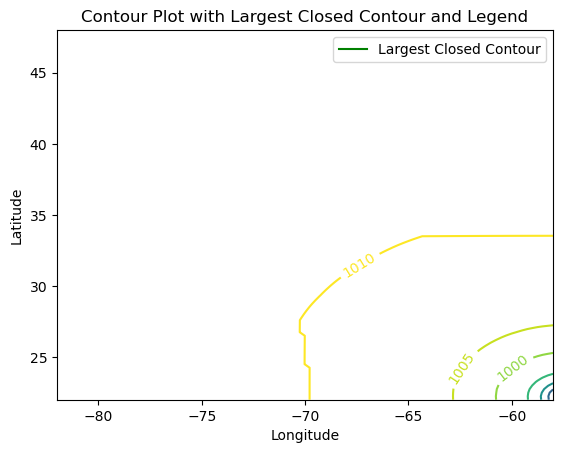

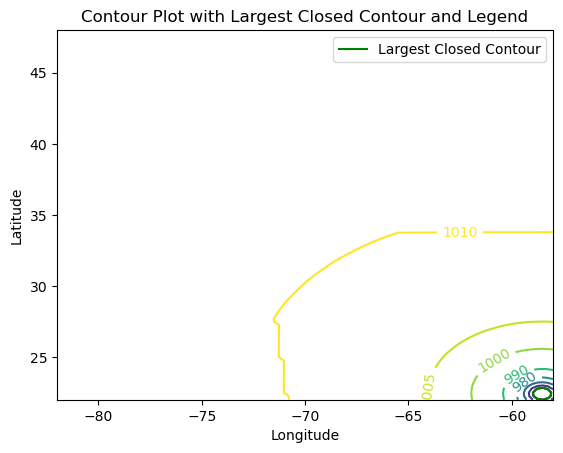

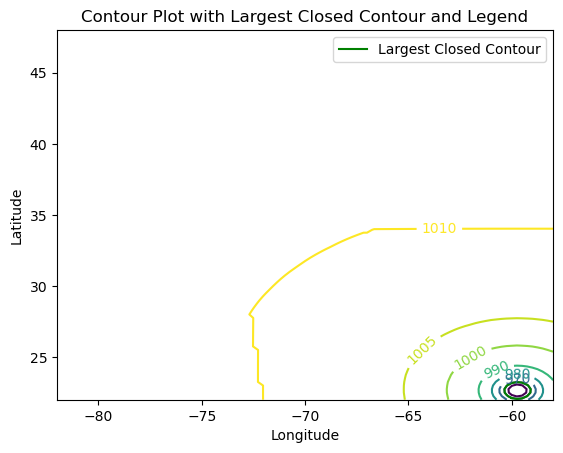

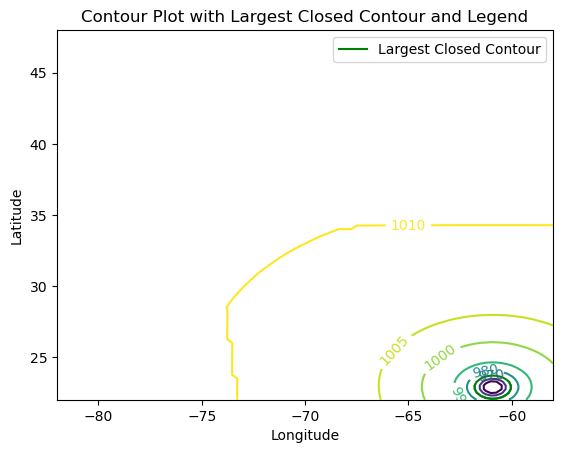

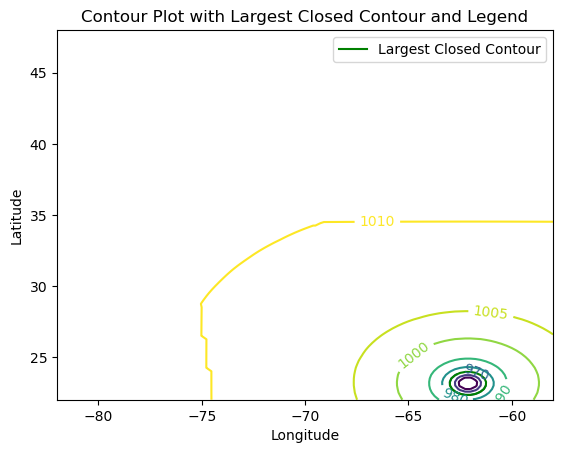

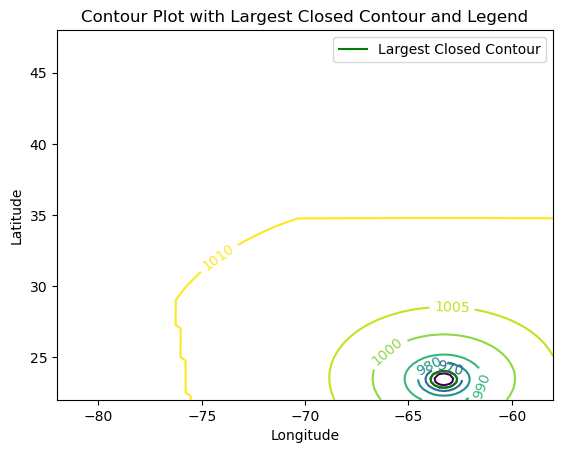

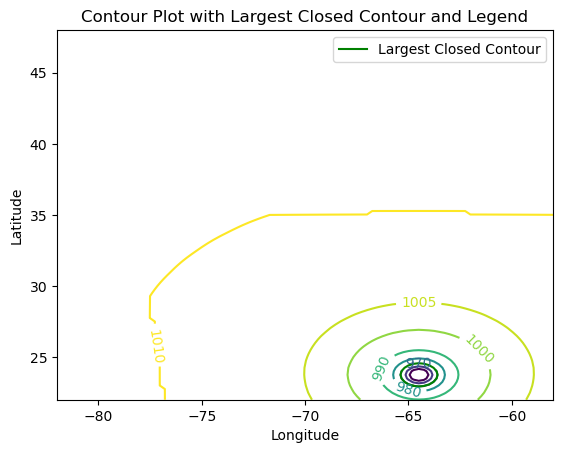

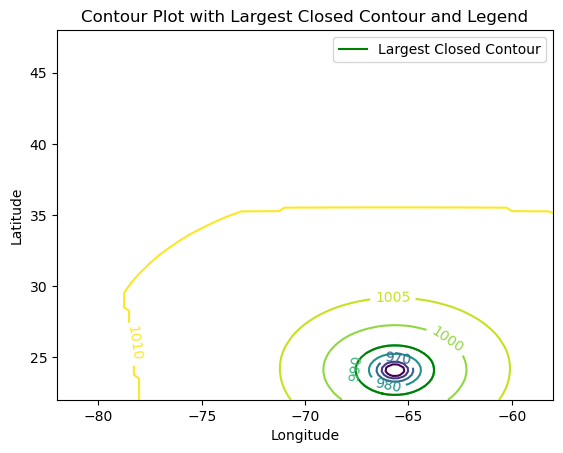

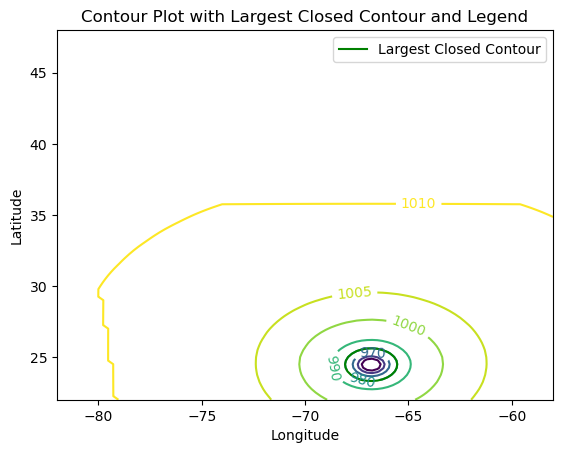

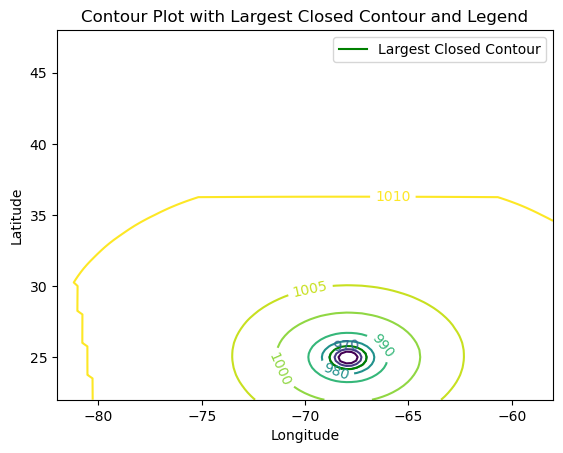

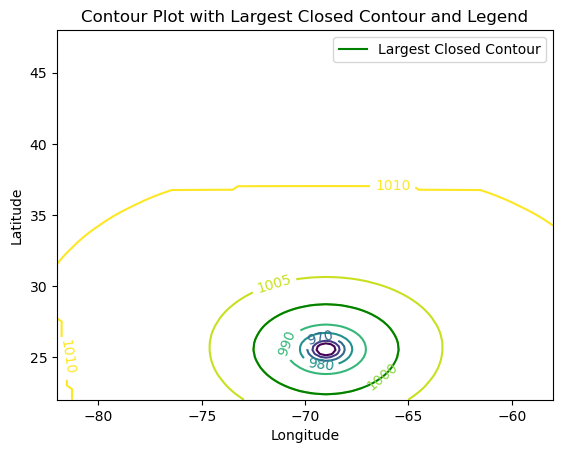

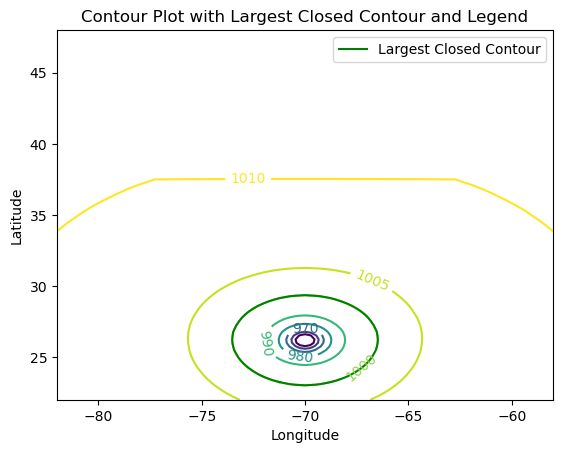

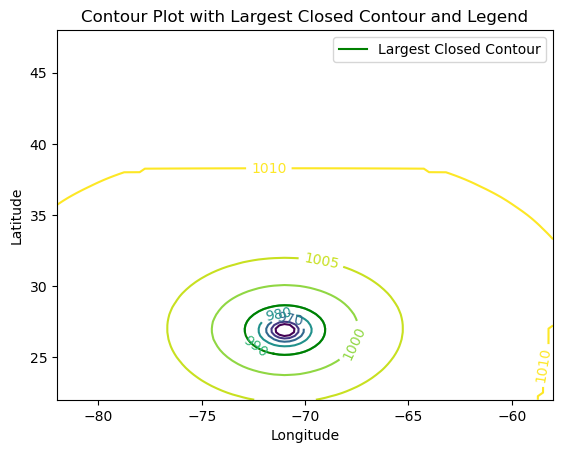

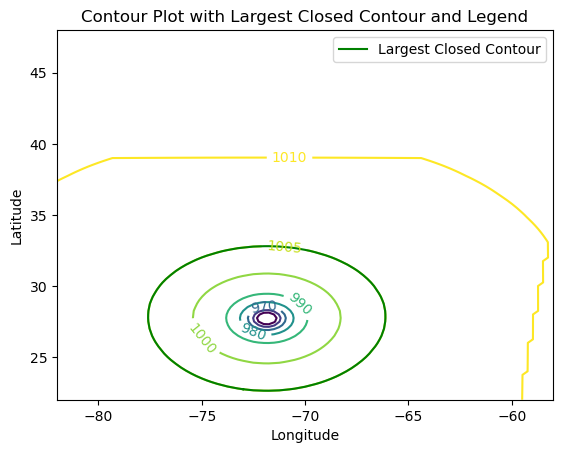

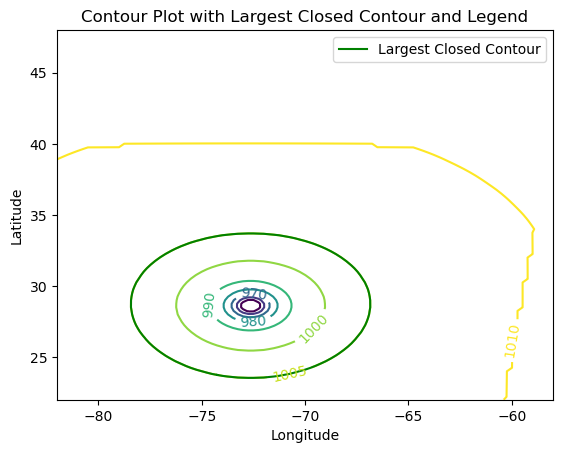

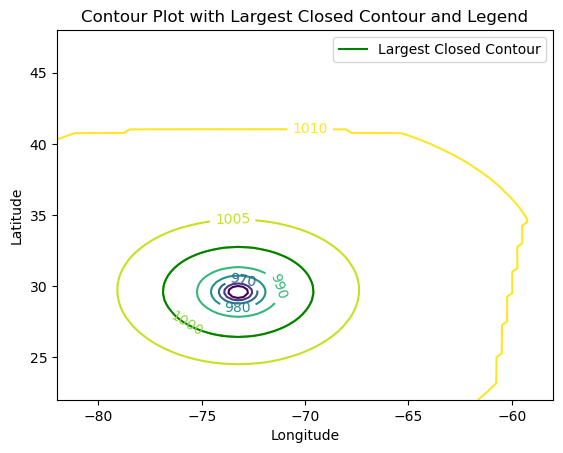

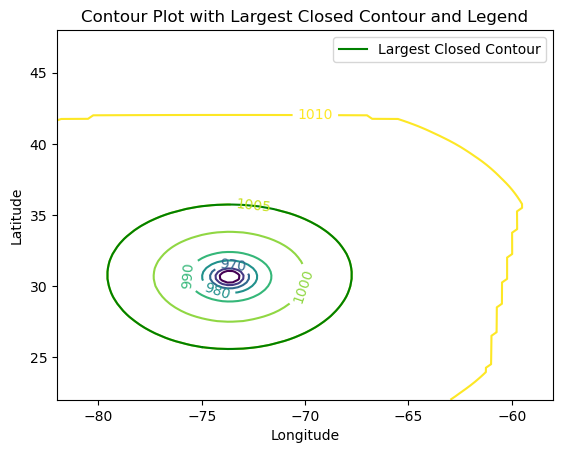

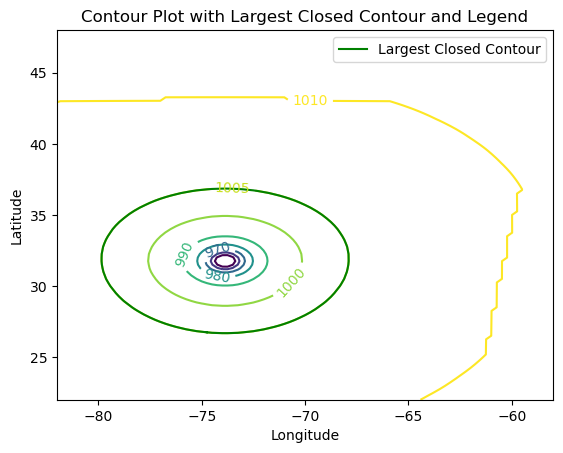

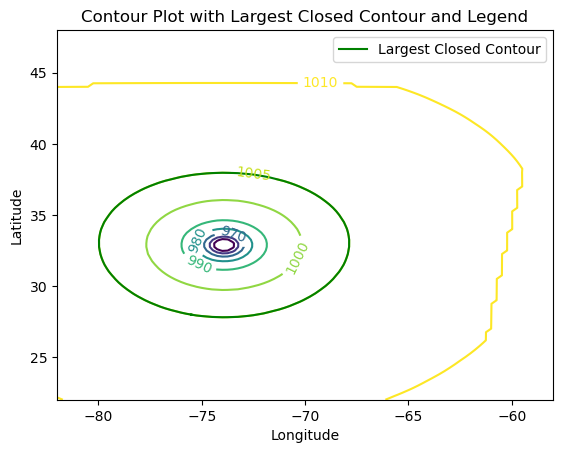

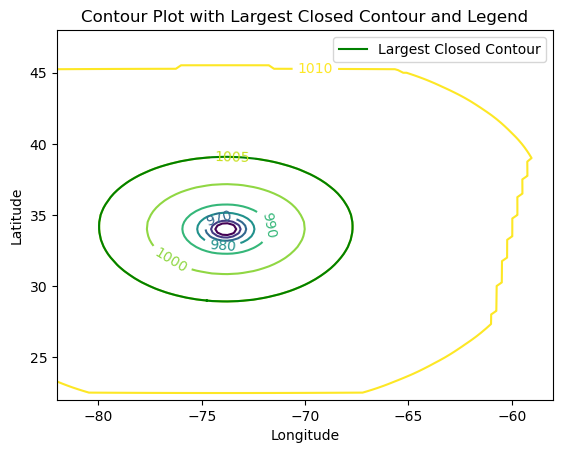

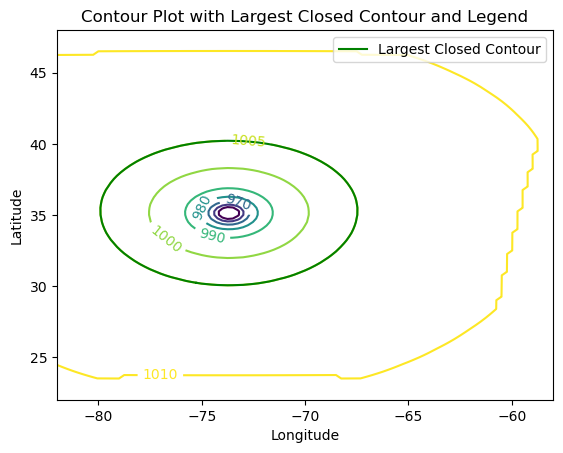

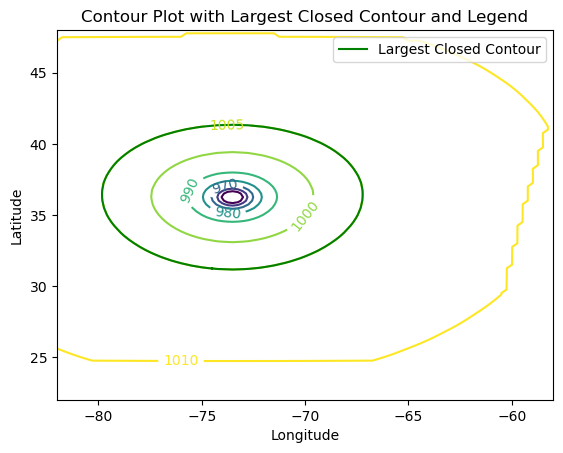

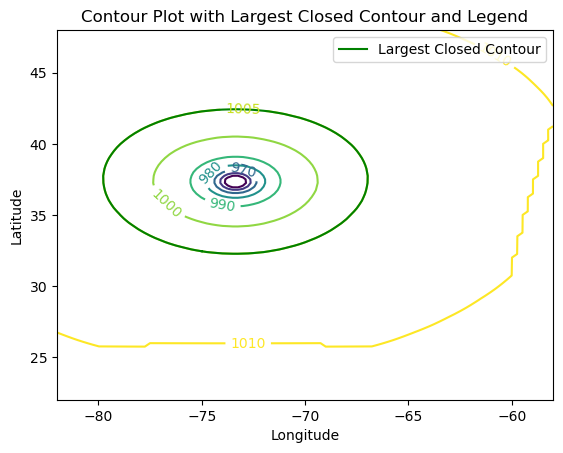

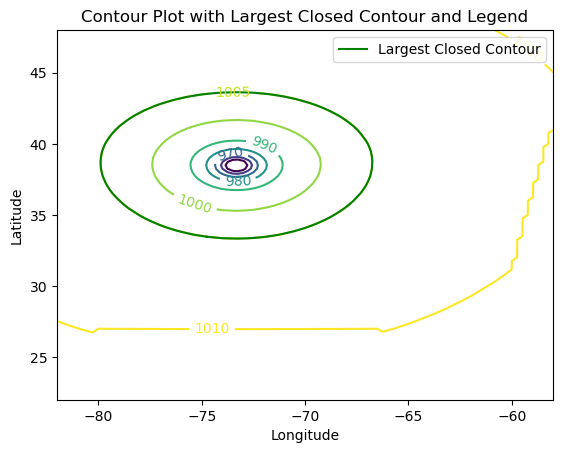

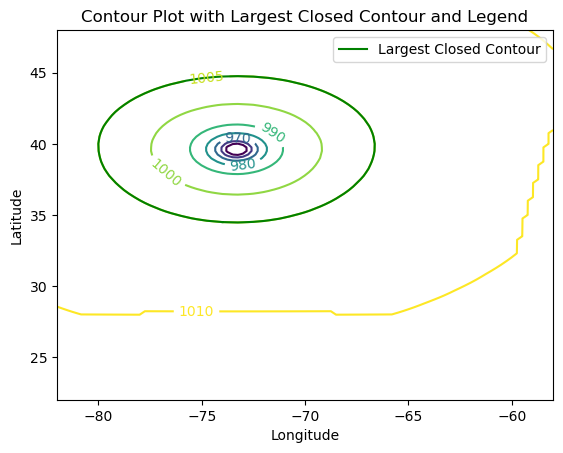

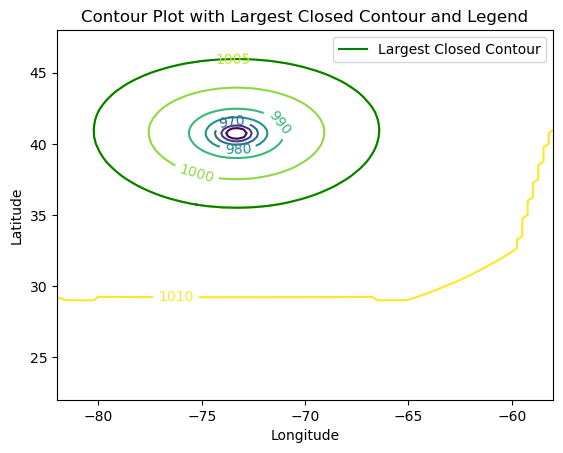

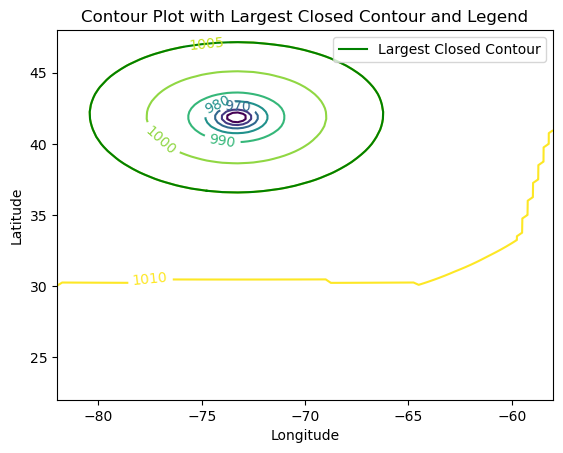

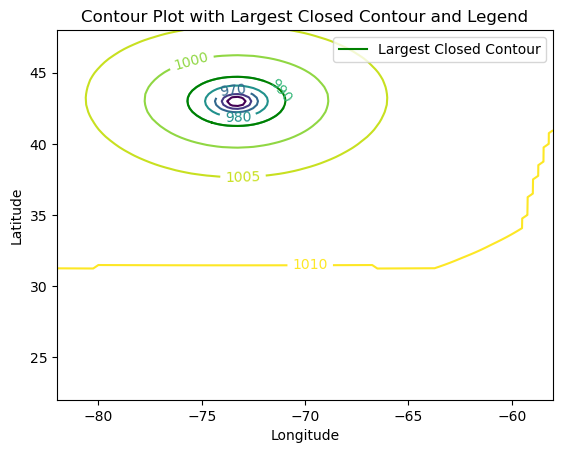

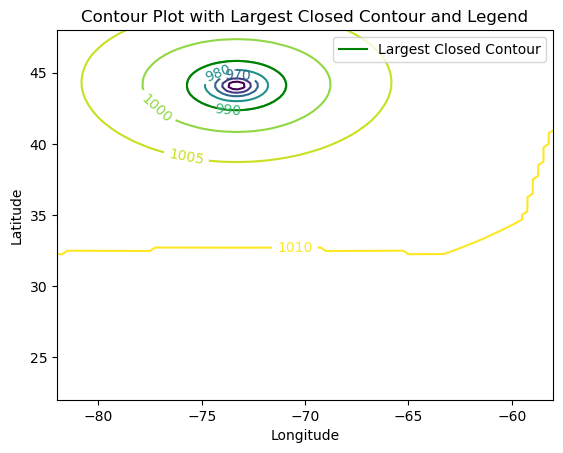

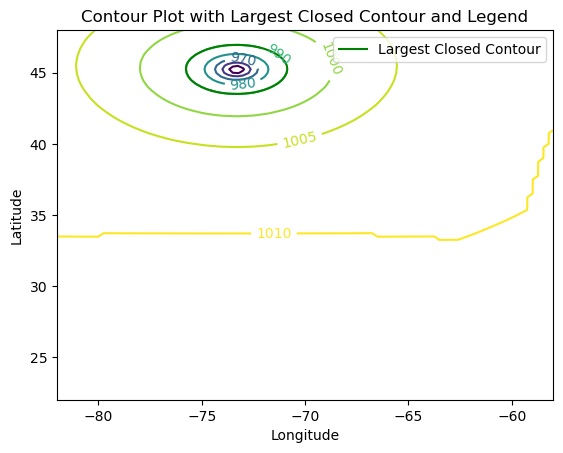

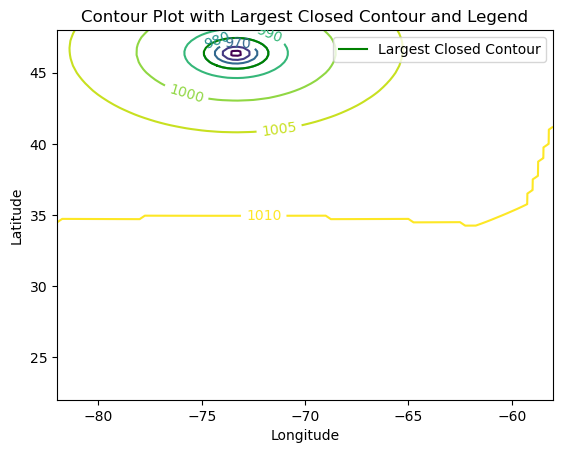

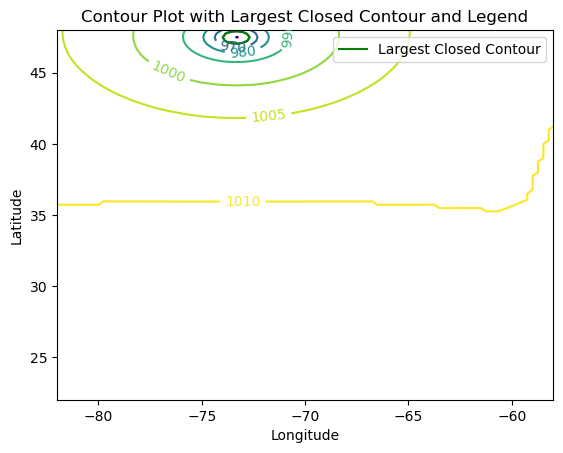

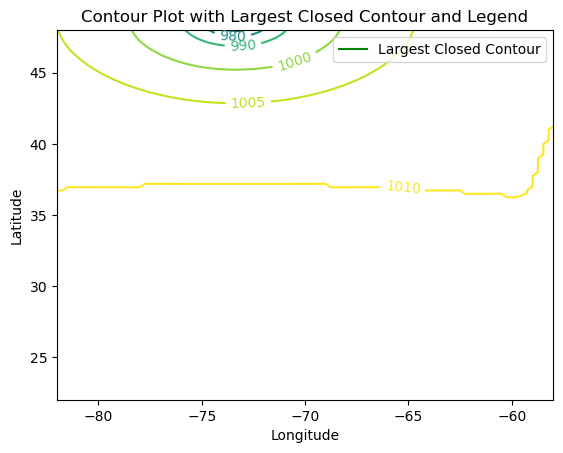

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Generate some sample data (replace this with your actual data)
lon = np.linspace(-180, 180, 100)
lat = np.linspace(-90, 90, 50)
lon, lat = np.meshgrid(lon, lat)
data = np.sin(np.radians(lat)) + np.cos(np.radians(lon))

# Create a contour plot
# contour_levels = np.linspace(data.min(), data.max(), 10)
for p in range(1, len(isacc.pressure), 20):
    fig = plt.figure()
    lev = [950, 960, 970, 980, 990, 1000, 1005, 1010]
    contour = plt.contour(isacc.lon, isacc.lat, isacc.pressure[p], levels=lev)
    
    # Extract contour indices
    contour_indices = contour.collections
    
    # Variables to store information about the largest closed contour
    max_closed_contour_index = -1
    max_closed_contour_area = 0
    max_closed_contour_indices = []
    
    # Iterate through contours
    for idx, contour_set in enumerate(contour_indices):
        for contour_line in contour_set.get_paths():
            x_values = contour_line.vertices[:, 0]
            y_values = contour_line.vertices[:, 1]
            
            # Check if the contour is closed (first_point == last_point)
            if x_values[0] == x_values[-1] and y_values[0] == y_values[-1]:
                # Calculate the area of the closed contour (you can use other metrics if needed)
                contour_area = np.abs(np.trapz(y_values, x_values))
    
                # Check if the current closed contour is larger than the previous ones
                if contour_area > max_closed_contour_area:
                    max_closed_contour_area = contour_area
                    max_closed_contour_index = idx
                    max_closed_contour_indices = list(zip(x_values, y_values))
    
    # Plot the largest closed contour
    if max_closed_contour_index != -1:
        max_closed_contour = contour_indices[max_closed_contour_index]
        for contour_line in max_closed_contour.get_paths():
            x_values = contour_line.vertices[:, 0]
            y_values = contour_line.vertices[:, 1]
            plt.plot(x_values, y_values, 'g-', label=f'Largest Closed Contour (Index {max_closed_contour_index})')
    
    # Create a legend
    legend_elements = [Line2D([0], [0], color='g', label='Largest Closed Contour')]
    plt.legend(handles=legend_elements, loc='upper right')
    
    # Return the array of indices from the largest closed contour
    # print("Indices of the largest closed contour:", np.array(max_closed_contour_indices))
    
    # Show the contour plot with legend
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Contour Plot with Largest Closed Contour and Legend')
    plt.clabel(contour, contour.levels, inline=True)
    plt.show()


In [7]:
isacc.radius

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [108]:
np.average(dist)

350.1868179930007

In [110]:
contour_values

[970.0, 980.0, 990.0, 1000.0, 1010.0]

In [10]:
eye

array([[ 22.  , -58.  ],
       [ 22.  , -58.  ],
       [ 22.  , -58.  ],
       ...,
       [ 48.  , -73.25],
       [ 48.  , -73.25],
       [ 48.  , -73.25]])

In [13]:
import numpy as np

def create_radial_gradient_array(shape, min_value=990.00, max_value=1013.00):
    rows, cols = shape
    center_row, center_col = rows // 2, cols // 2

    # Create a meshgrid
    x, y = np.meshgrid(np.arange(cols), np.arange(rows))

    # Calculate radial distance from the center
    radial_distance = np.sqrt((x - center_col)**2 + (y - center_row)**2)

    # Normalize the distance to be in the range [0, 1]
    normalized_distance = radial_distance / radial_distance.max()

    # Create a radial gradient array
    gradient_array = min_value + normalized_distance * (max_value - min_value)

    return gradient_array

# Example usage:
array_shape = (5, 5)  # Adjust the shape as needed
gradient_array = create_radial_gradient_array(array_shape)

print(gradient_array)


[[1013.         1008.18309655 1006.26345597 1008.18309655 1013.        ]
 [1008.18309655 1001.5         998.13172798 1001.5        1008.18309655]
 [1006.26345597  998.13172798  990.          998.13172798 1006.26345597]
 [1008.18309655 1001.5         998.13172798 1001.5        1008.18309655]
 [1013.         1008.18309655 1006.26345597 1008.18309655 1013.        ]]


In [14]:
import numpy as np

def haversine(lat1, lon1, lat2, lon2):
    # Haversine formula to calculate distance between two points on a sphere
    R = 6371.0  # Earth radius in kilometers
    dlat = np.radians(lat2 - lat1)
    dlon = np.radians(lon2 - lon1)
    a = np.sin(dlat / 2)**2 + np.cos(np.radians(lat1)) * np.cos(np.radians(lat2)) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    distance = R * c
    return distance

def create_registered_array(latitudes, longitudes, target_distance_km, min_value=990.00, max_value=1013.00):
    rows, cols = len(latitudes), len(longitudes)
    center_lat, center_lon = latitudes[rows // 2], longitudes[cols // 2]

    # Create a meshgrid of lat/lon coordinates
    lon_mesh, lat_mesh = np.meshgrid(longitudes, latitudes)

    # Calculate distances from the center using Haversine formula
    distances_km = haversine(center_lat, center_lon, lat_mesh, lon_mesh)

    # Normalize distances to be in the range [0, 1]
    normalized_distances = distances_km / distances_km.max()

    # Create a radial gradient array based on normalized distances
    gradient_array = min_value + normalized_distances * (max_value - min_value)

    return gradient_array

# Example usage:
latitudes = np.linspace(10.0, 20.0, 5)  # Adjust as needed
longitudes = np.linspace(20.0, 30.0, 5)  # Adjust as needed
target_distance_km = 100.0  # Adjust as needed

registered_array = create_registered_array(latitudes, longitudes, target_distance_km)

print(registered_array)


[[1013.         1008.31555702 1006.46038407 1008.31555702 1013.        ]
 [1007.98100101 1001.47313673  998.23019204 1001.47313673 1007.98100101]
 [1005.89917189  997.94971279  990.          997.94971279 1005.89917189]
 [1007.81578131 1001.40854469  998.23019204 1001.40854469 1007.81578131]
 [1012.74140176 1008.23468348 1006.46038407 1008.23468348 1012.74140176]]


In [19]:
import data_storms
data_storms.pressure_radius(latitudes, longitudes, registered_array, eye)

776860.157542904

In [16]:
eye = np.unravel_index(np.argmin(registered_array), registered_array.shape)

In [17]:
eye

(2, 2)